In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:

# 1. Load dataset
data = pd.read_csv("/content/mock_kaggle.csv")

# 2. Date preprocessing
data['data'] = pd.to_datetime(data['data'])
data.set_index('data', inplace=True)

# 3. Calculate daily income
data['daily_income'] = data['venda'] * data['preco']

# 4. Monthly income (sum)
monthly_income = data['daily_income'].resample('ME').sum()

# 5. Normalize income to calculate Retailer Score (0–100)
retailer_score = (monthly_income - monthly_income.min()) / \
                 (monthly_income.max() - monthly_income.min()) * 100

# 6. Final DataFrame
result = pd.DataFrame({
    'Monthly_Income': monthly_income,
    'Retailer_Score': retailer_score.round(2)
})

print(result.head())


            Monthly_Income  Retailer_Score
data                                      
2014-01-31         4528.55           29.19
2014-02-28         2182.82           10.32
2014-03-31         2536.76           13.17
2014-04-30         2297.30           11.24
2014-05-31         3241.91           18.84


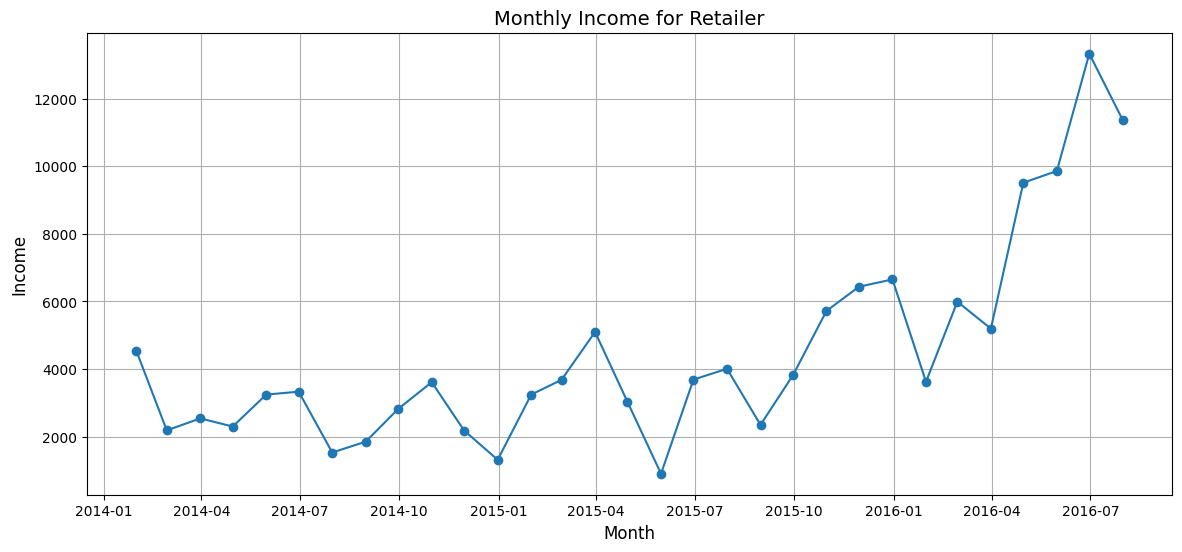

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(result['Monthly_Income'], marker='o')
plt.title("Monthly Income for Retailer", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.grid(True)
plt.show()


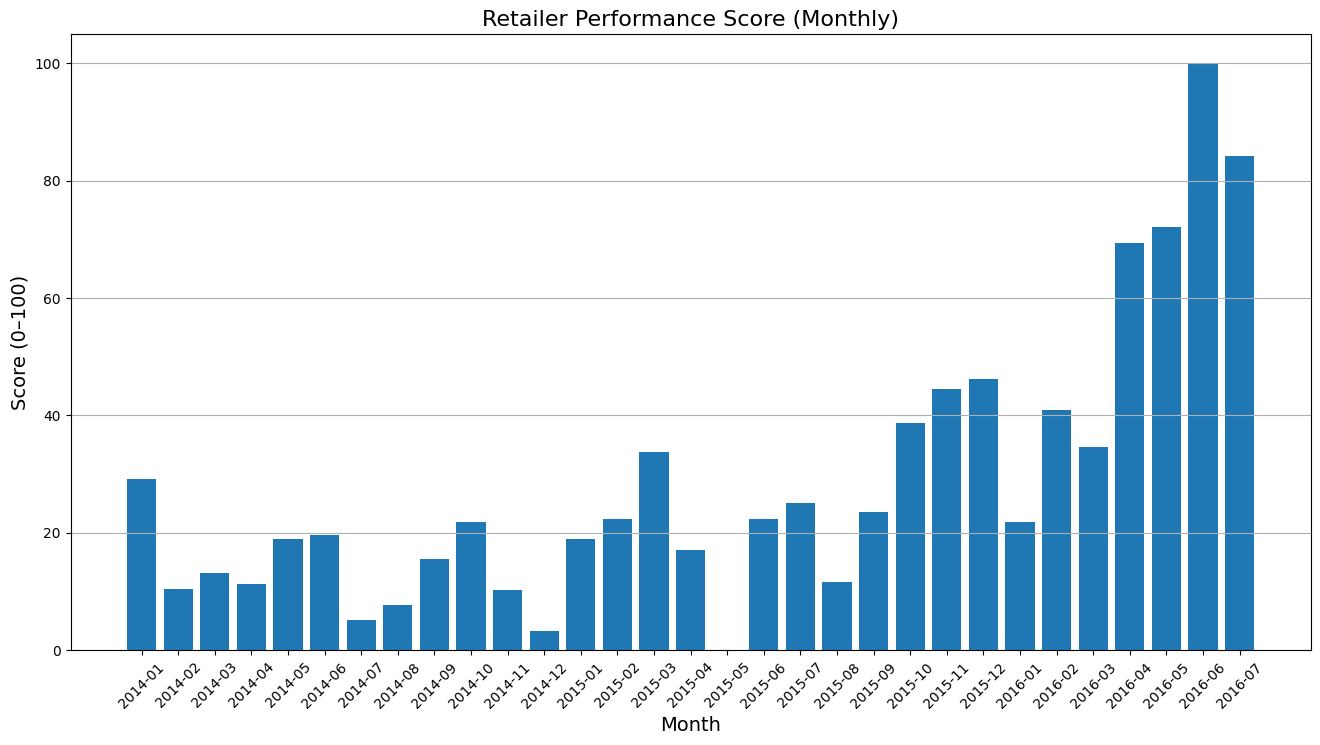

In [10]:
plt.figure(figsize=(16, 8))
plt.bar(result.index.strftime('%Y-%m'), result['Retailer_Score'])

plt.title("Retailer Performance Score (Monthly)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Score (0–100)", fontsize=14)

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()
